In [47]:
import string
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
df = pd.read_excel('./data/winnings.xlsx')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393 entries, 0 to 1392
Data columns (total 21 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   date_GMT                               1393 non-null   object 
 1   Country                                1393 non-null   object 
 2   League                                 1393 non-null   object 
 3   Home Team                              1393 non-null   object 
 4   Away Team                              1393 non-null   object 
 5   Home Team Points Per Game (Pre-Match)  1393 non-null   float64
 6   Away Team Points Per Game (Pre-Match)  1393 non-null   float64
 7   Home Team Points Per Game (Current)    1393 non-null   float64
 8   Away Team Points Per Game (Current)    1393 non-null   float64
 9   Average Goals                          1393 non-null   float64
 10  BTTS Average                           1393 non-null   int64  
 11  Over

In [39]:
df.head(10)

,date_GMT,Country,League,Home Team,Away Team,Home Team Points Per Game (Pre-Match),Away Team Points Per Game (Pre-Match),Home Team Points Per Game (Current),Away Team Points Per Game (Current),Average Goals,...,Over05 Average,Over15 Average,Match Status,Home Team Pre-Match xG,Away Team Pre-Match xG,Game Week,Match FootyStats URL,Result - Home Team Goals,Result - Away Team Goals,Total Goals
0,Aug 31 2024 - 11:00pm,USA,USL Championship,Detroit City FC,Hartford Athletic,1.33,0.36,1.31,0.42,2.37,...,96,61,complete,1.07,1.23,28,/usa/hartford-athletic-vs-detroit-city-fc-h2h-...,1,1,2
1,Aug 31 2024 - 11:00pm,USA,USL Championship,Indy Eleven,Pittsburgh Riverhounds,1.42,1.08,1.38,1.07,2.26,...,85,65,complete,1.47,1.22,28,/usa/indy-eleven-vs-pittsburgh-riverhounds-fc-...,1,1,2
2,Aug 31 2024 - 11:00pm,USA,USL Championship,Miami FC,Monterey Bay,0.50,0.83,0.67,0.77,3.08,...,100,81,complete,1.27,1.17,34,/usa/miami-fc-vs-monterey-bay-fc-h2h-stats#729...,1,0,1
3,Aug 31 2024 - 11:00pm,Canada,Canadian Premier League,Atlético Ottawa,Vancouver FC,1.50,1.22,1.64,1.10,3.44,...,100,95,complete,1.50,1.08,21,/canada/atletico-ottawa-vs-vancouver-fc-h2h-st...,1,0,1
4,Aug 31 2024 - 11:00pm,Paraguay,Division Profesional,Guaraní,Cerro Porteño,1.33,2.14,1.39,2.07,2.39,...,89,70,complete,1.35,1.67,9,/paraguay/club-guarani-vs-club-cerro-porteno-h...,1,0,1
5,Aug 31 2024 - 11:00pm,El Salvador,Salvadoran Primera División,Municipal Limeño,FAS,1.80,1.00,1.57,1.25,2.22,...,82,72,complete,1.46,1.50,8,/el-salvador/cd-municipal-limeno-vs-cd-fas-h2h...,1,1,2
6,Aug 31 2024 - 11:30pm,USA,USL Championship,Rhode Island,Birmingham Legion,1.33,1.75,1.46,1.62,2.25,...,84,67,complete,1.62,1.41,28,/usa/birmingham-legion-fc-vs-rhode-island-fc-h...,2,0,2
7,Aug 31 2024 - 11:30pm,USA,USL Championship,North Carolina FC,Louisville City,1.75,1.67,1.71,1.77,2.42,...,84,63,complete,1.36,1.58,28,/usa/north-carolina-fc-vs-louisville-city-fc-h...,4,6,10
8,Sep 01 2024 - 12:00am,Argentina,Prim B Nacional,Gimnasia Jujuy,Club Atlético Güemes,2.07,0.50,2.19,0.47,1.47,...,86,47,complete,1.42,1.13,30,/argentina/gimnasia-y-esgrima-de-jujuy-vs-club...,1,0,1
9,Sep 01 2024 - 12:00am,Chile,Primera División,Everton,Unión Española,1.27,0.90,1.42,0.82,2.39,...,86,67,complete,1.61,1.41,23,/chile/everton-de-vina-del-mar-vs-union-espano...,3,2,5


In [40]:
df.rename(columns={'date_GMT': 'date'}, inplace=True)
df['date'] = pd.to_datetime(df['date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393 entries, 0 to 1392
Data columns (total 21 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   date                                   1393 non-null   datetime64[ns]
 1   Country                                1393 non-null   object        
 2   League                                 1393 non-null   object        
 3   Home Team                              1393 non-null   object        
 4   Away Team                              1393 non-null   object        
 5   Home Team Points Per Game (Pre-Match)  1393 non-null   float64       
 6   Away Team Points Per Game (Pre-Match)  1393 non-null   float64       
 7   Home Team Points Per Game (Current)    1393 non-null   float64       
 8   Away Team Points Per Game (Current)    1393 non-null   float64       
 9   Average Goals                          1393 non-null   float64 

In [41]:
df.head()

,date,Country,League,Home Team,Away Team,Home Team Points Per Game (Pre-Match),Away Team Points Per Game (Pre-Match),Home Team Points Per Game (Current),Away Team Points Per Game (Current),Average Goals,...,Over05 Average,Over15 Average,Match Status,Home Team Pre-Match xG,Away Team Pre-Match xG,Game Week,Match FootyStats URL,Result - Home Team Goals,Result - Away Team Goals,Total Goals
0,2024-08-31 23:00:00,USA,USL Championship,Detroit City FC,Hartford Athletic,1.33,0.36,1.31,0.42,2.37,...,96,61,complete,1.07,1.23,28,/usa/hartford-athletic-vs-detroit-city-fc-h2h-...,1,1,2
1,2024-08-31 23:00:00,USA,USL Championship,Indy Eleven,Pittsburgh Riverhounds,1.42,1.08,1.38,1.07,2.26,...,85,65,complete,1.47,1.22,28,/usa/indy-eleven-vs-pittsburgh-riverhounds-fc-...,1,1,2
2,2024-08-31 23:00:00,USA,USL Championship,Miami FC,Monterey Bay,0.50,0.83,0.67,0.77,3.08,...,100,81,complete,1.27,1.17,34,/usa/miami-fc-vs-monterey-bay-fc-h2h-stats#729...,1,0,1
3,2024-08-31 23:00:00,Canada,Canadian Premier League,Atlético Ottawa,Vancouver FC,1.50,1.22,1.64,1.10,3.44,...,100,95,complete,1.50,1.08,21,/canada/atletico-ottawa-vs-vancouver-fc-h2h-st...,1,0,1
4,2024-08-31 23:00:00,Paraguay,Division Profesional,Guaraní,Cerro Porteño,1.33,2.14,1.39,2.07,2.39,...,89,70,complete,1.35,1.67,9,/paraguay/club-guarani-vs-club-cerro-porteno-h...,1,0,1


In [42]:
df = df.drop(columns='Match FootyStats URL')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393 entries, 0 to 1392
Data columns (total 20 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   date                                   1393 non-null   datetime64[ns]
 1   Country                                1393 non-null   object        
 2   League                                 1393 non-null   object        
 3   Home Team                              1393 non-null   object        
 4   Away Team                              1393 non-null   object        
 5   Home Team Points Per Game (Pre-Match)  1393 non-null   float64       
 6   Away Team Points Per Game (Pre-Match)  1393 non-null   float64       
 7   Home Team Points Per Game (Current)    1393 non-null   float64       
 8   Away Team Points Per Game (Current)    1393 non-null   float64       
 9   Average Goals                          1393 non-null   float64 

In [43]:
""" 
Encode the teams
"""

home_teams = []
for _ in df['Home Team'].unique():
    home_teams.append(_)
    home_teams.sort()
len(home_teams)

1312

In [44]:
away_teams = []
for _ in df['Away Team'].unique():
    away_teams.append(_)
    away_teams.sort()

len(away_teams)

1316

In [45]:
combined_teams = []

for _ in away_teams:
    if _ not in home_teams:
        home_teams.append(_)
        home_teams.sort()

len(home_teams)

1972

In [46]:
countries = []

for _ in df['Country'].unique():
    _ = _.upper()
    countries.append(_)
    countries.sort()

len(countries)

47

## Visualizations
Lets look at the distributions of different columns within this dataset.

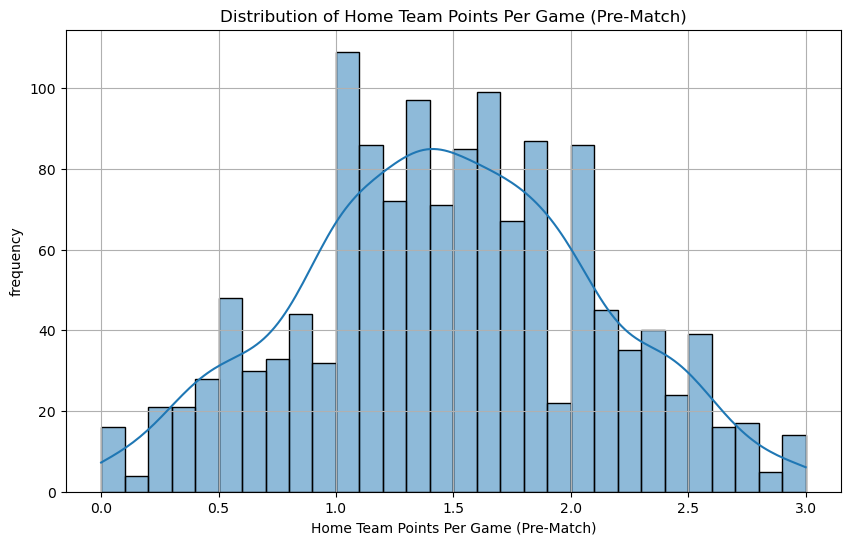

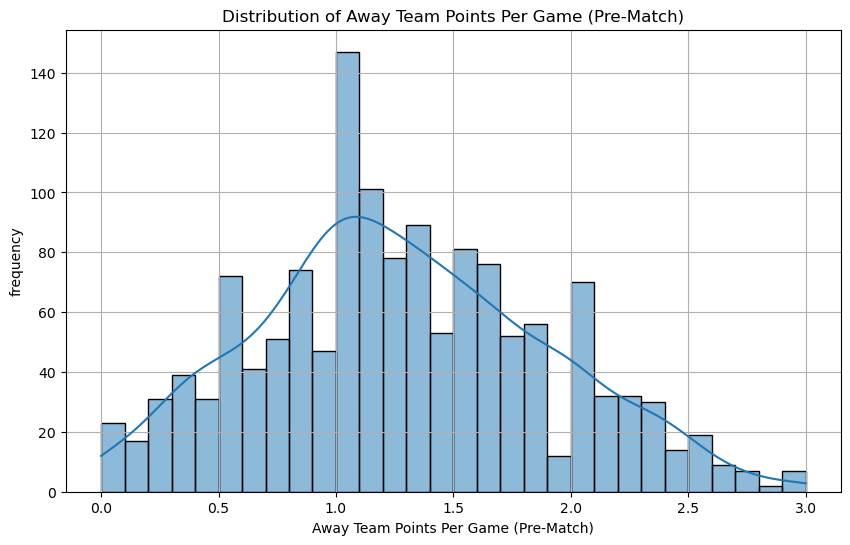

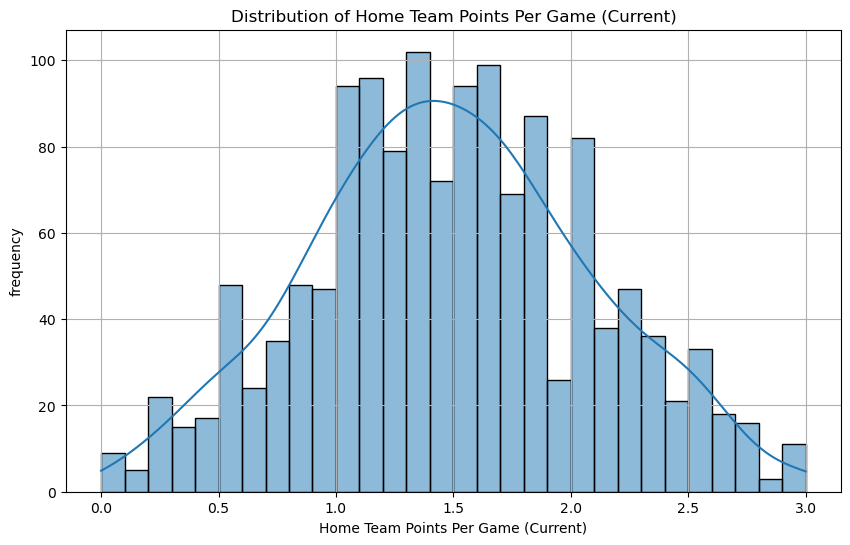

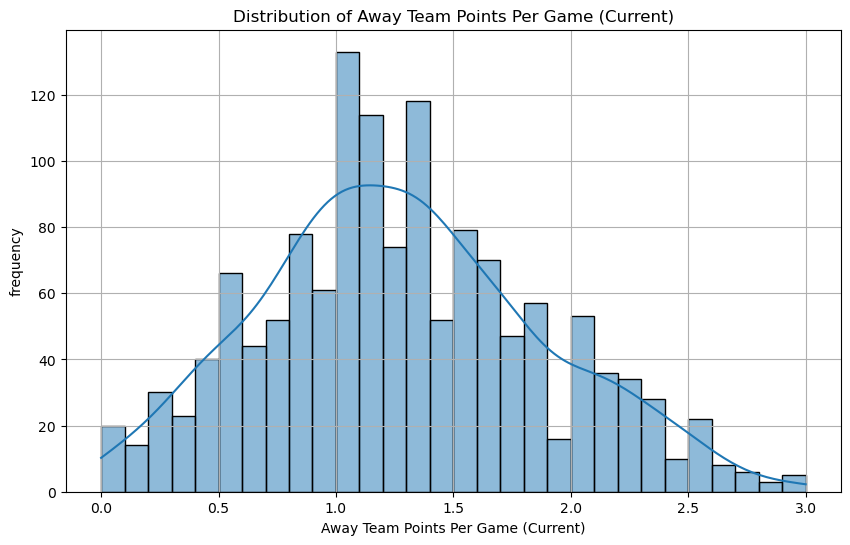

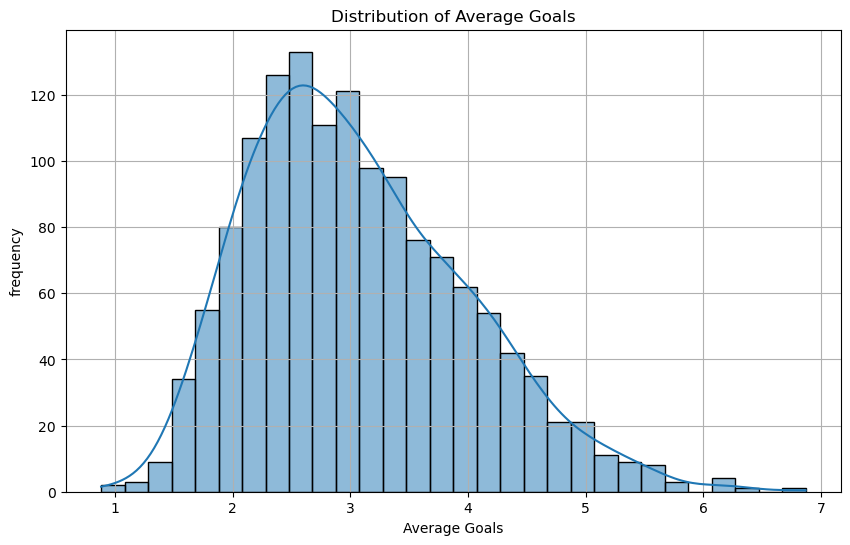

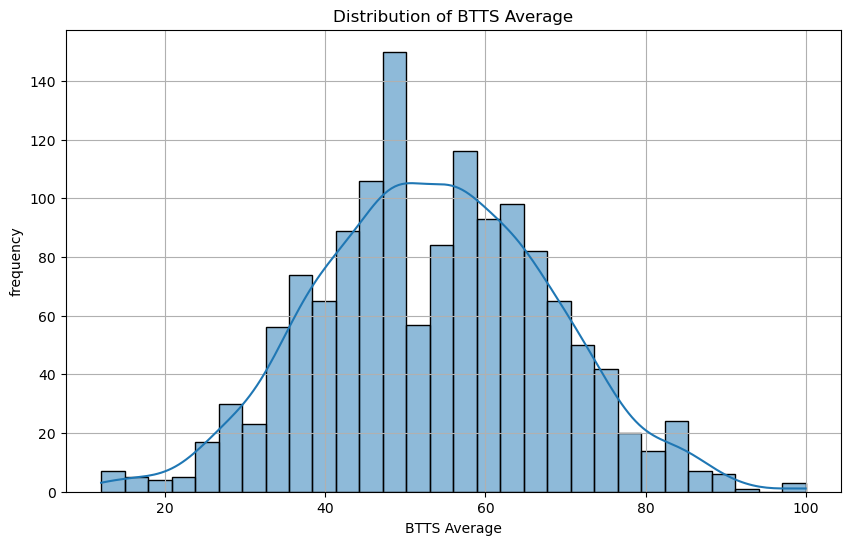

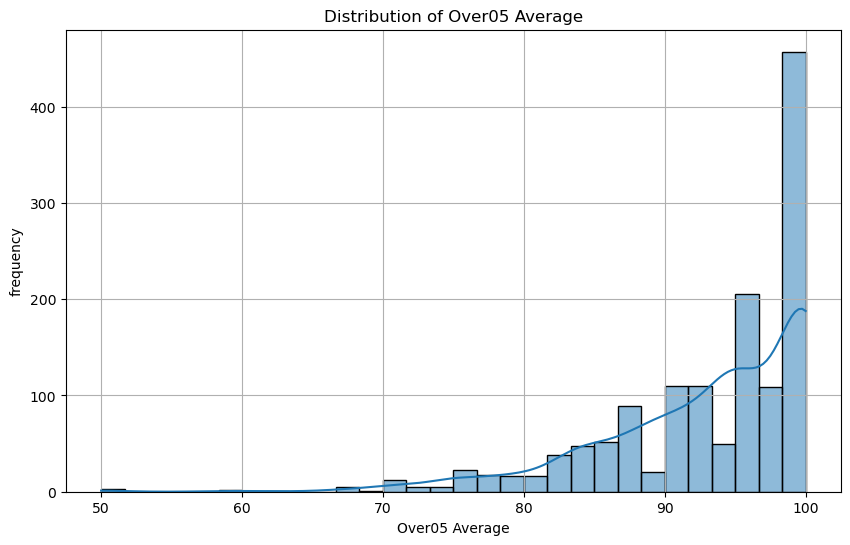

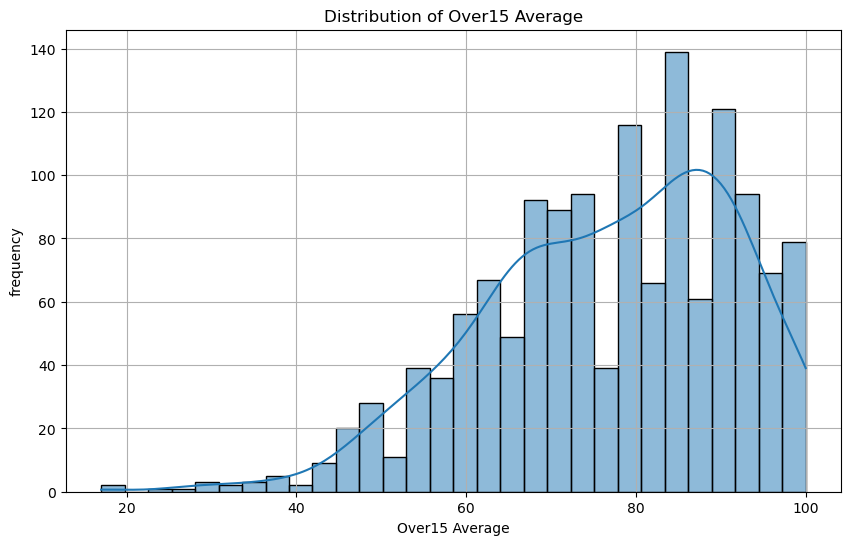

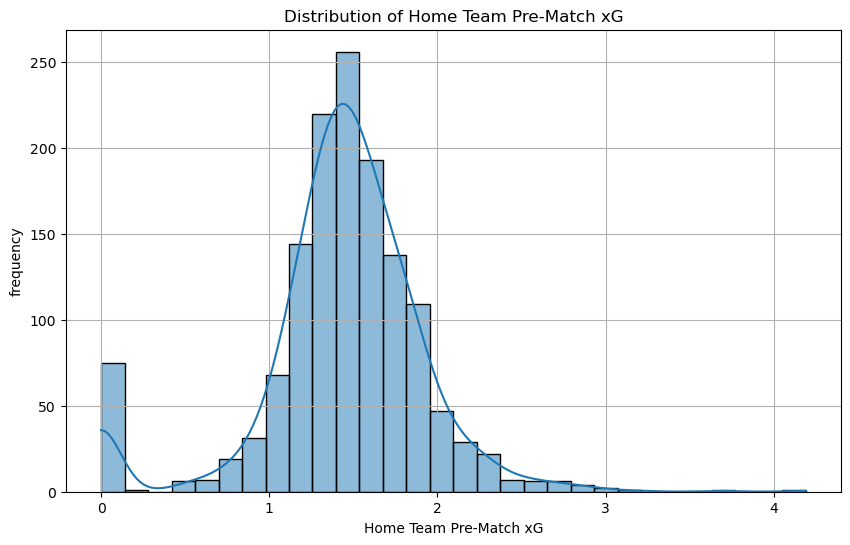

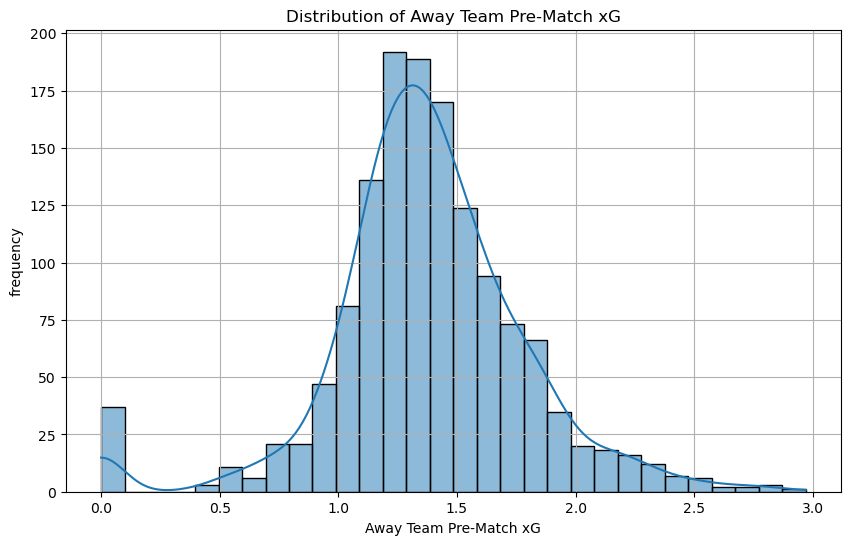

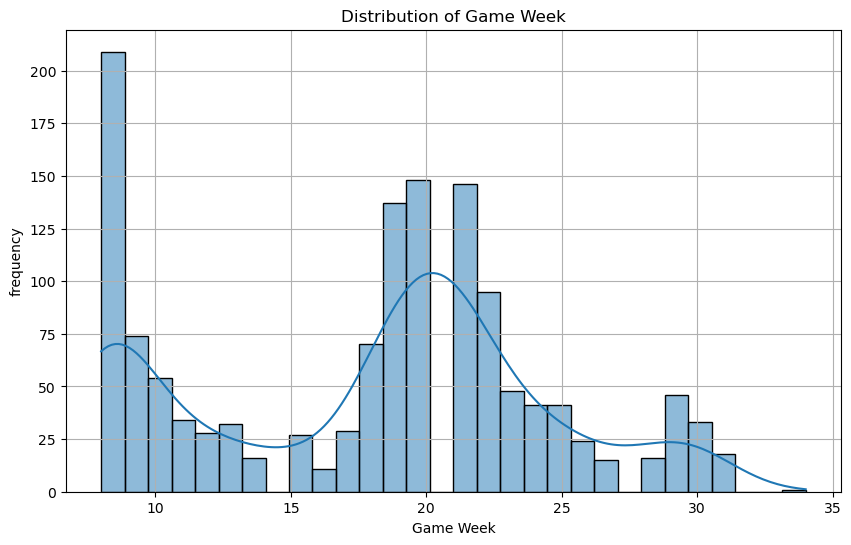

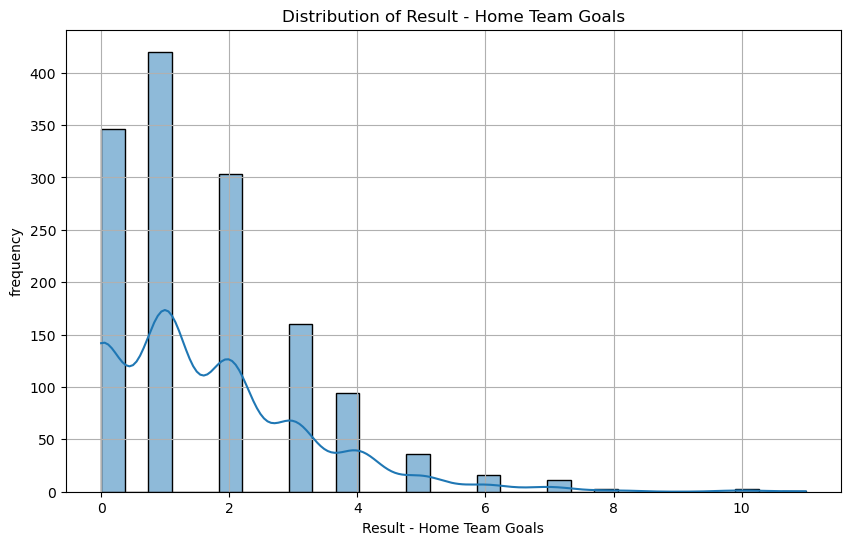

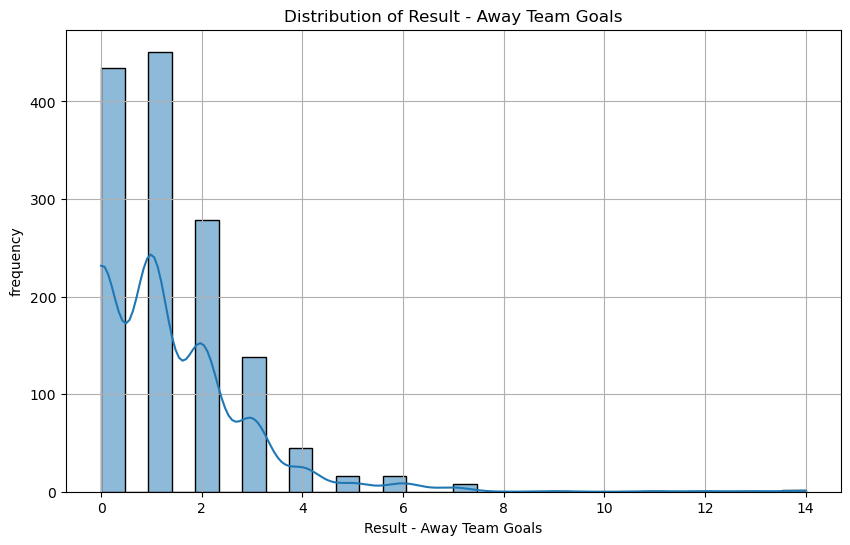

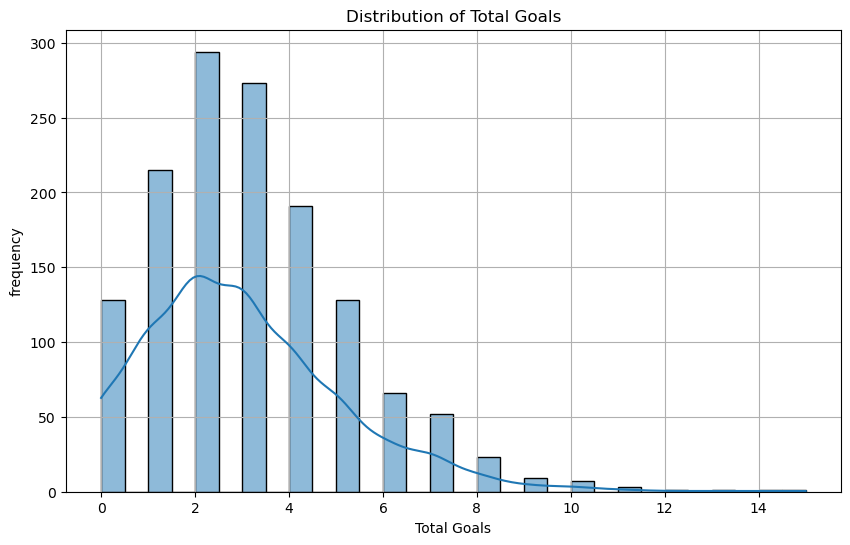

In [48]:
num_columns = df.select_dtypes(include=['float64', 'int64'] )

for col in num_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('frequency')
    plt.grid(True)
    plt.show()
